**DATASET DESCRIPTION**
*   price - price in US dollars (\$326-\$18,823)
*   carat - weight of the diamond (0.2-5.01)
*   cut - quality of the cut (Fair, Good, Very Good, Premium, Ideal)
*   color - diamond colour, from J (worst) to D (best)
*   clarity - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
*   x - length in mm (0-10.74)
*   y - width in mm (0-58.9)
*   z - depth in mm (0-31.8)
*   depth - total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43-79)
*   table - width of top of diamond relative to widest point (43-95)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.shape

(53940, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


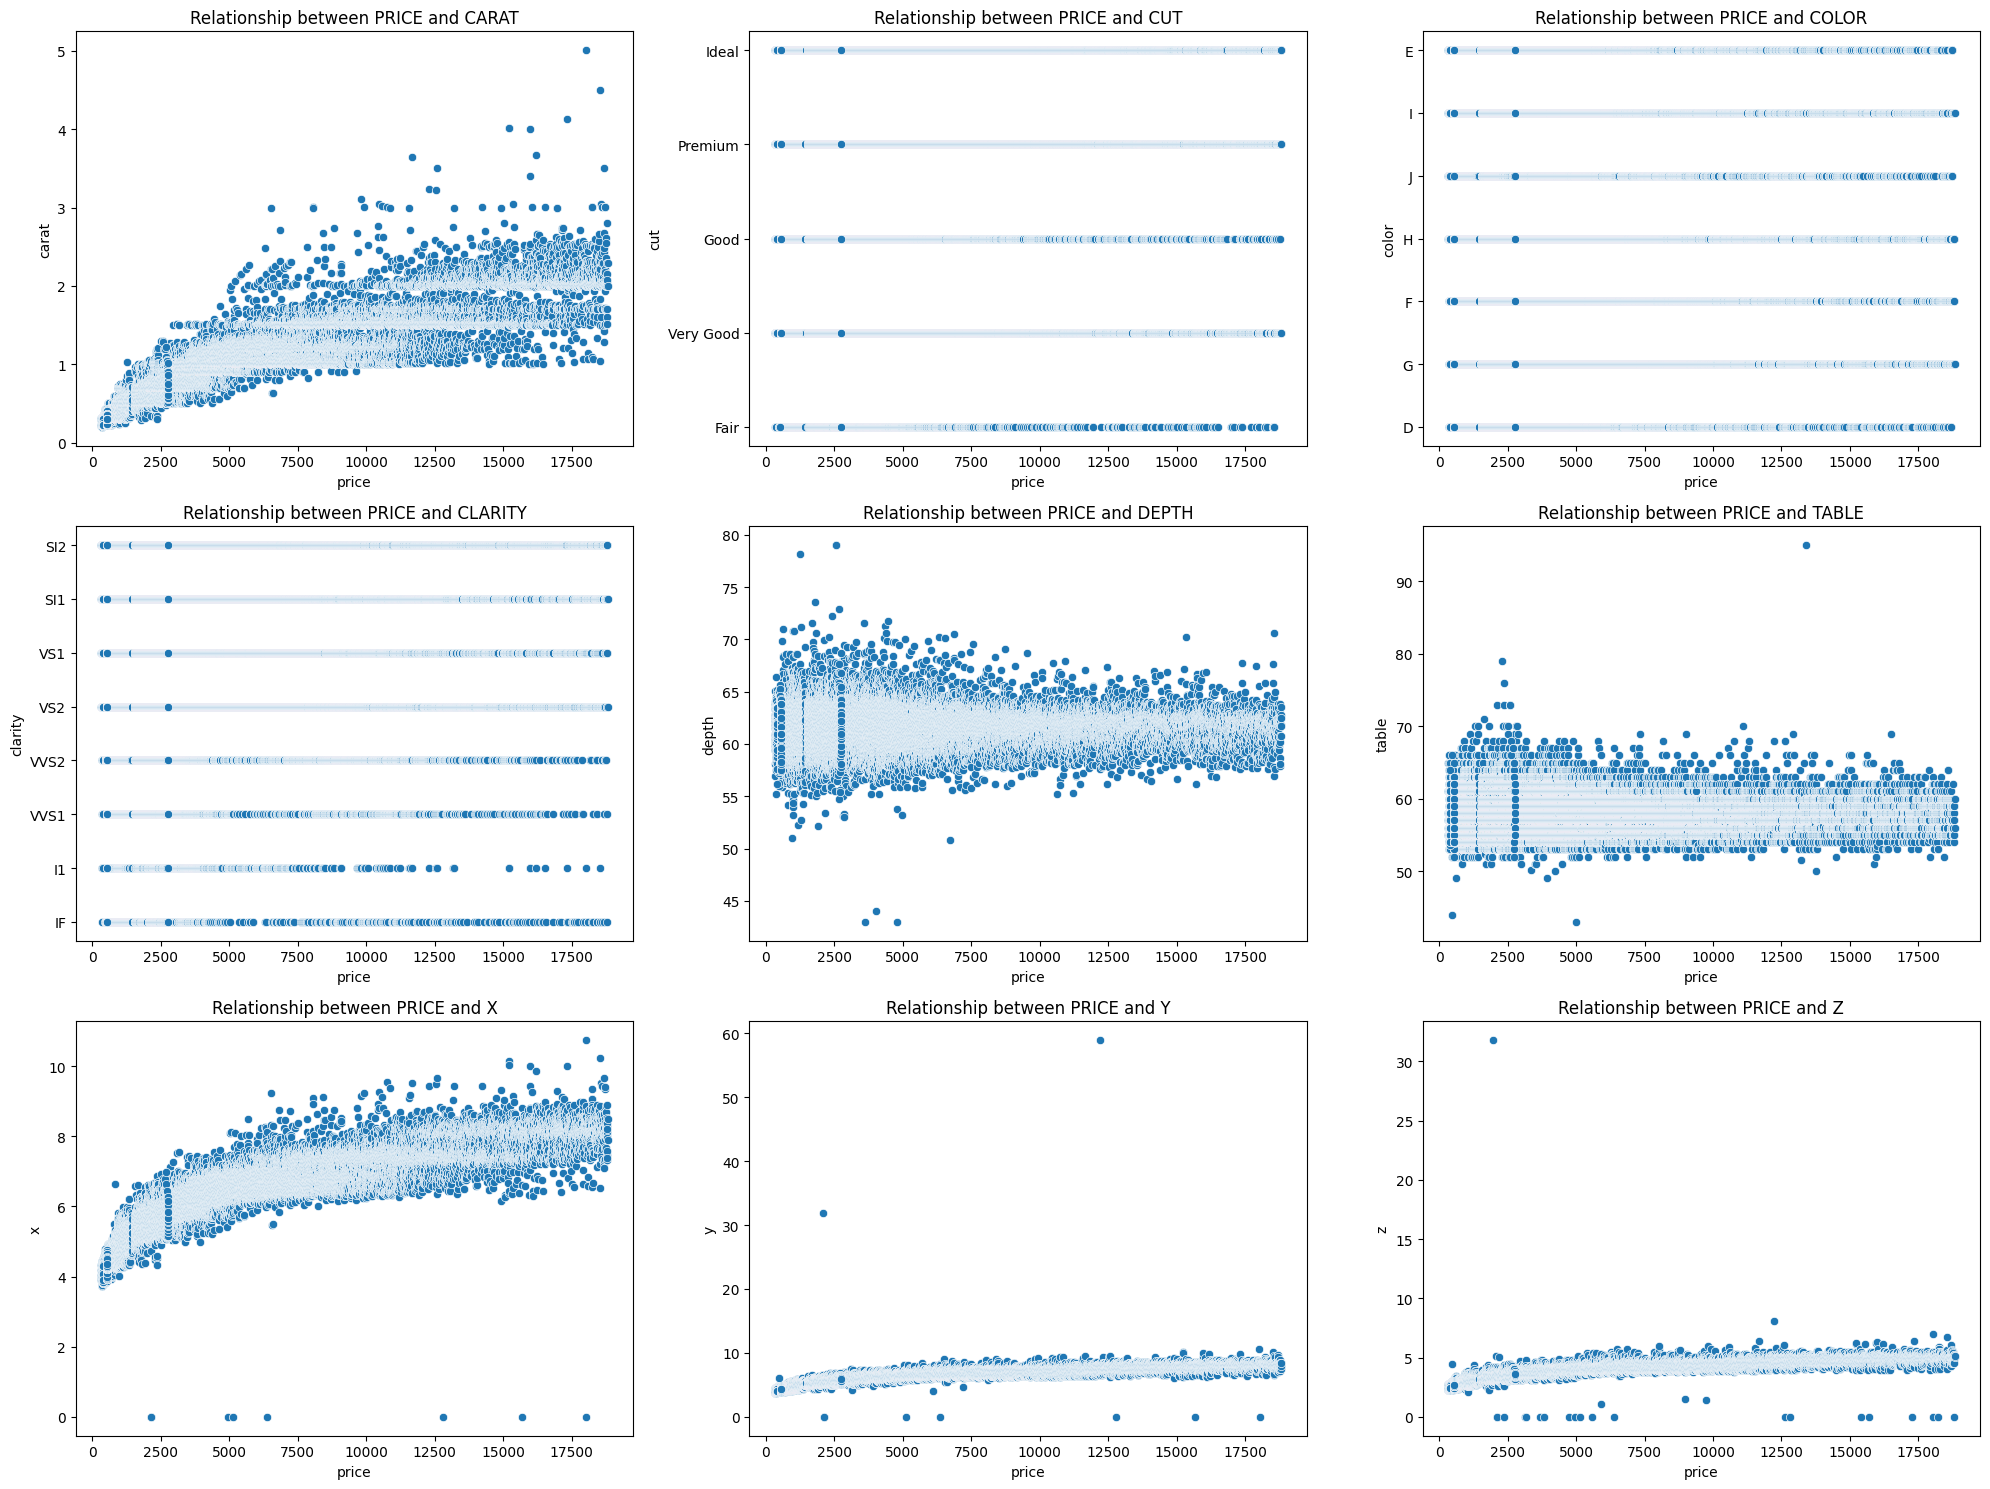

In [ ]:
x = df['price']
y = df.drop(['price'], axis=1)

plt.figure(figsize = (20, 15))
for i, col in enumerate(y.columns, 1):
  plt.subplot(3, 3, i)
  sns.scatterplot(x=x, y=y[col])
  plt.title(f'Relationship between PRICE and {col.upper()}')
  plt.tight_layout()
plt.show()

Фичи table, x, y, z, depth имеют выбросы, которые повлияют на результаты моделей, поэтому удалим их.

In [ ]:
# Удаляем выбросы
df = df.drop(df[(df['depth']<45) | (df['depth']>75)].index)
df = df.drop(df[(df['table']<45) | (df['table']>80)].index)
df = df.drop(df[df['x']==0].index)
df = df.drop(df[(df['y']==0) | (df['y']>20)].index)
df = df.drop(df[(df['z']<2) | (df['z']>20)].index)
df.shape

(53905, 10)

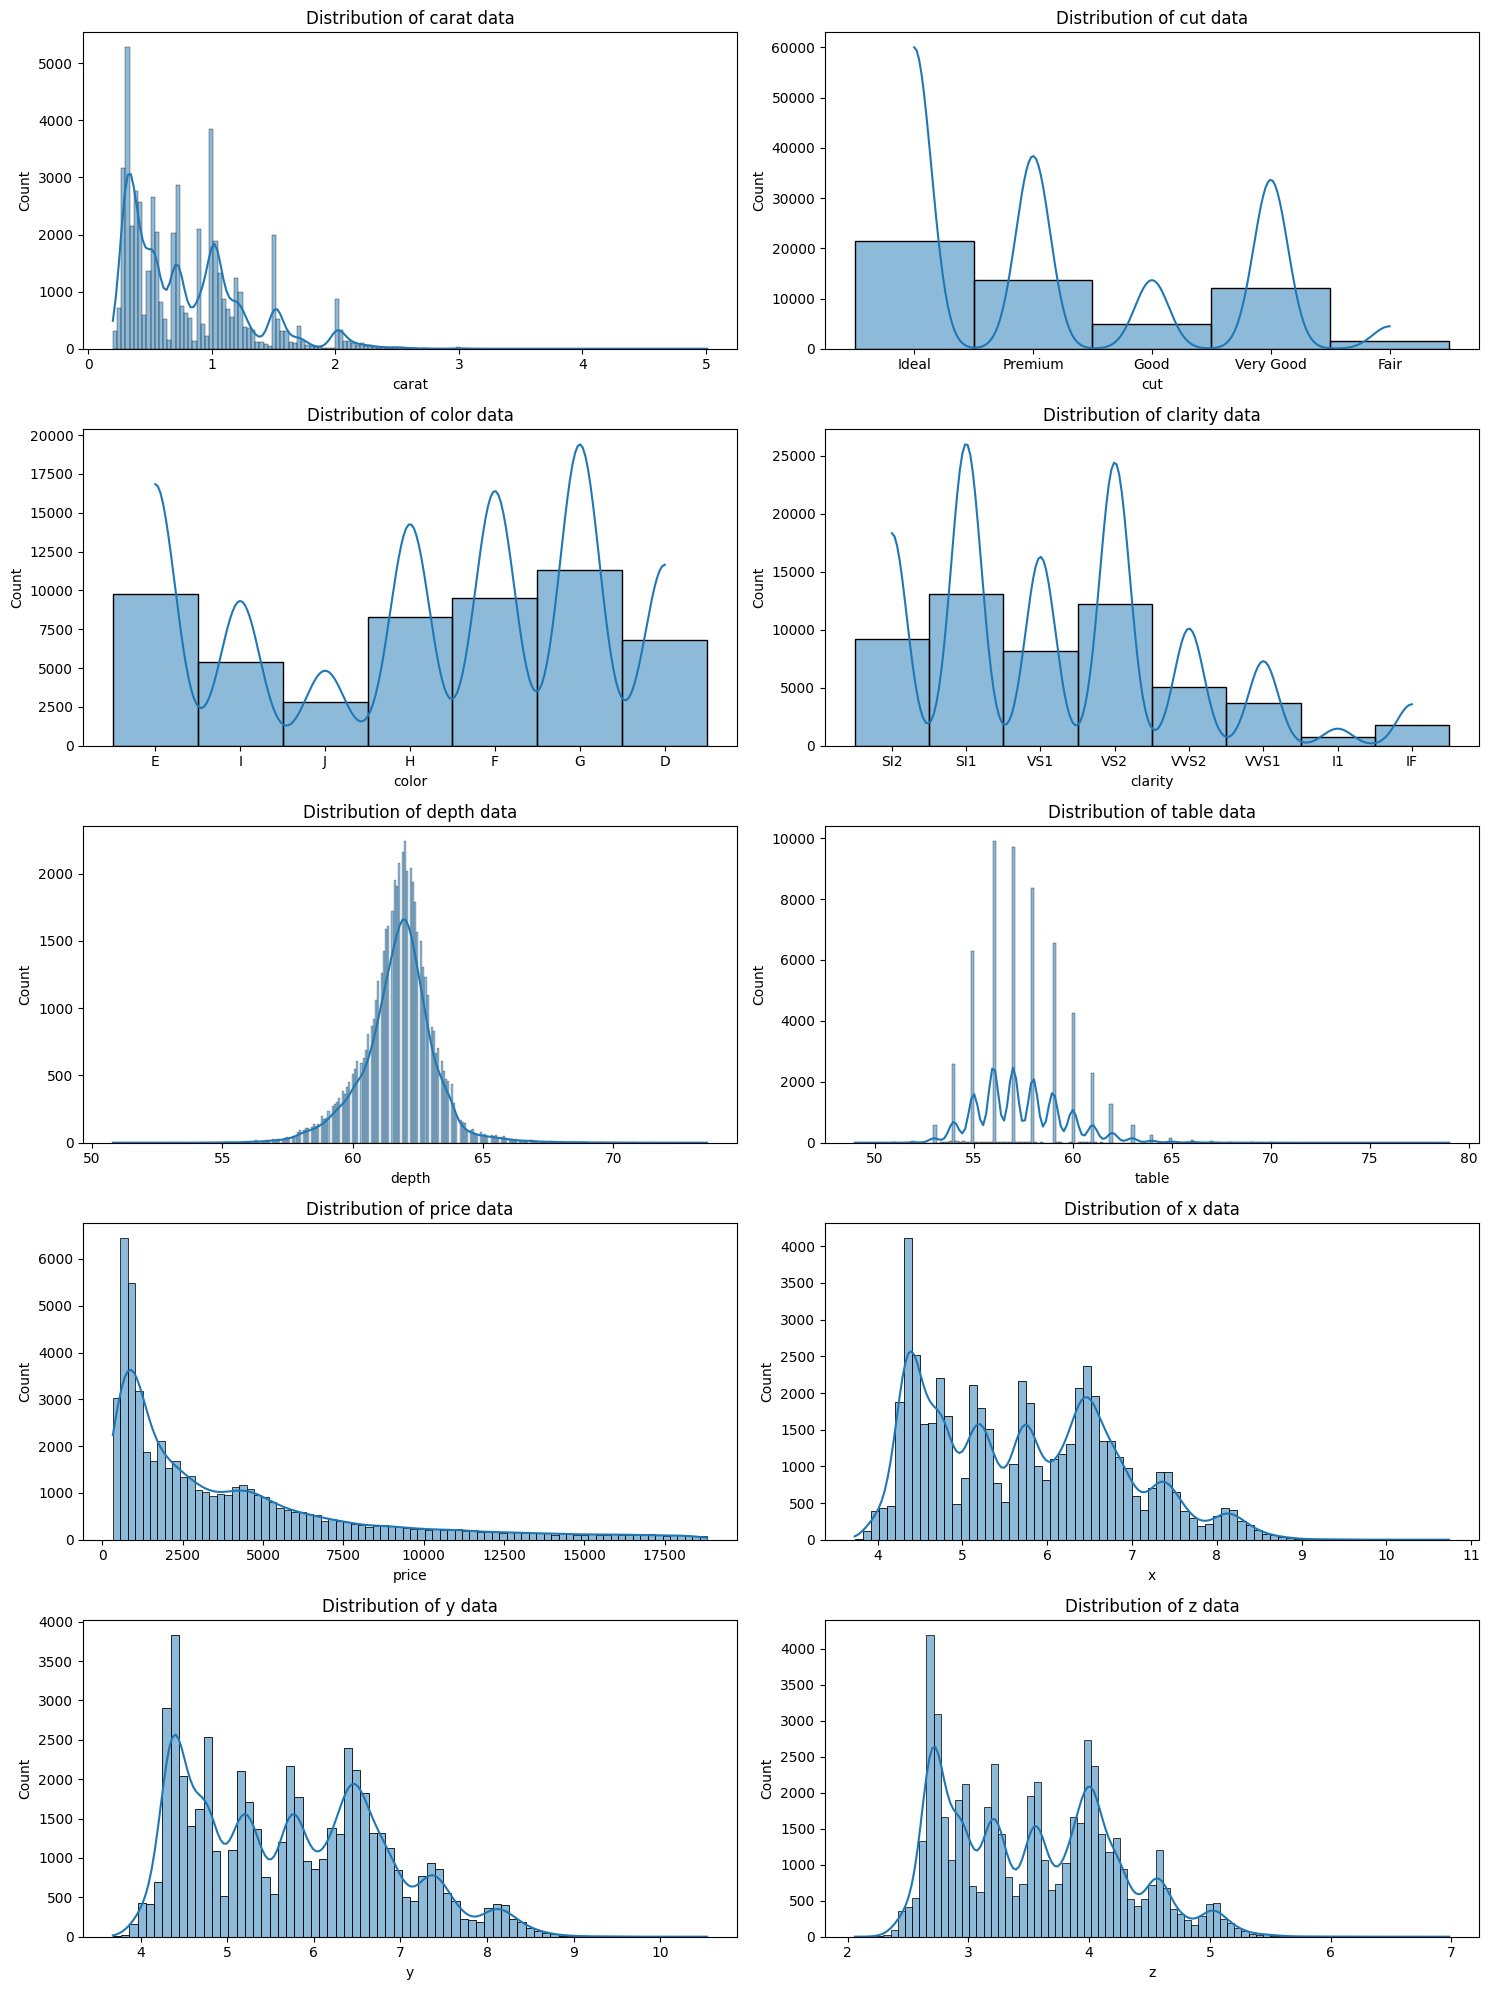

In [ ]:
plt.figure(figsize = (15, 20))
for i, col in enumerate(df.columns, 1):
    plt.subplot(5, 2, i)
    sns.histplot(x=df[col], kde=True)
    plt.title(f"Distribution of {col} data")
    plt.tight_layout()
plt.show()

In [ ]:
# Изменяем категориальные данные
from sklearn.preprocessing import OrdinalEncoder

df_encoded = df.copy()

cut = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
encoder = OrdinalEncoder(categories = [cut])
df_encoded['cut_encoded'] = encoder.fit_transform(df_encoded[['cut']])

color = ['J', 'I', 'H', 'G', 'F', 'E', 'D']   # from J (worst) to D (best)
encoder = OrdinalEncoder(categories = [color])
df_encoded['color_encoded'] = encoder.fit_transform(df_encoded[['color']])

clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']  # I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)
encoder = OrdinalEncoder(categories = [clarity])
df_encoded['clarity_encoded'] = encoder.fit_transform(df_encoded[['clarity']])

df_encoded.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,4.0,5.0,1.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3.0,5.0,2.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1.0,5.0,4.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3.0,1.0,3.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1.0,0.0,1.0


In [ ]:
df_encoded[['cut','cut_encoded']].value_counts()

cut        cut_encoded
Ideal      4.0            21542
Premium    3.0            13779
Very Good  2.0            12079
Good       1.0             4902
Fair       0.0             1603
Name: count, dtype: int64

In [ ]:
df_encoded[['color','color_encoded']].value_counts()

color  color_encoded
G      3.0              11282
E      5.0               9791
F      4.0               9536
H      2.0               8296
D      6.0               6774
I      1.0               5419
J      0.0               2807
Name: count, dtype: int64

In [ ]:
df_encoded[['clarity','clarity_encoded']].value_counts()

clarity  clarity_encoded
SI1      2.0                13059
VS2      3.0                12250
SI2      1.0                 9184
VS1      4.0                 8165
VVS2     5.0                 5066
VVS1     6.0                 3654
IF       7.0                 1790
I1       0.0                  737
Name: count, dtype: int64

In [ ]:
df1 = df_encoded.copy()
df1 = df1.drop(['cut', 'color', 'clarity'], axis=1)

df1.head()

,carat,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,0.23,61.5,55.0,326,3.95,3.98,2.43,4.0,5.0,1.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,3.0,5.0,2.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1.0,5.0,4.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,3.0,1.0,3.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1.0,0.0,1.0


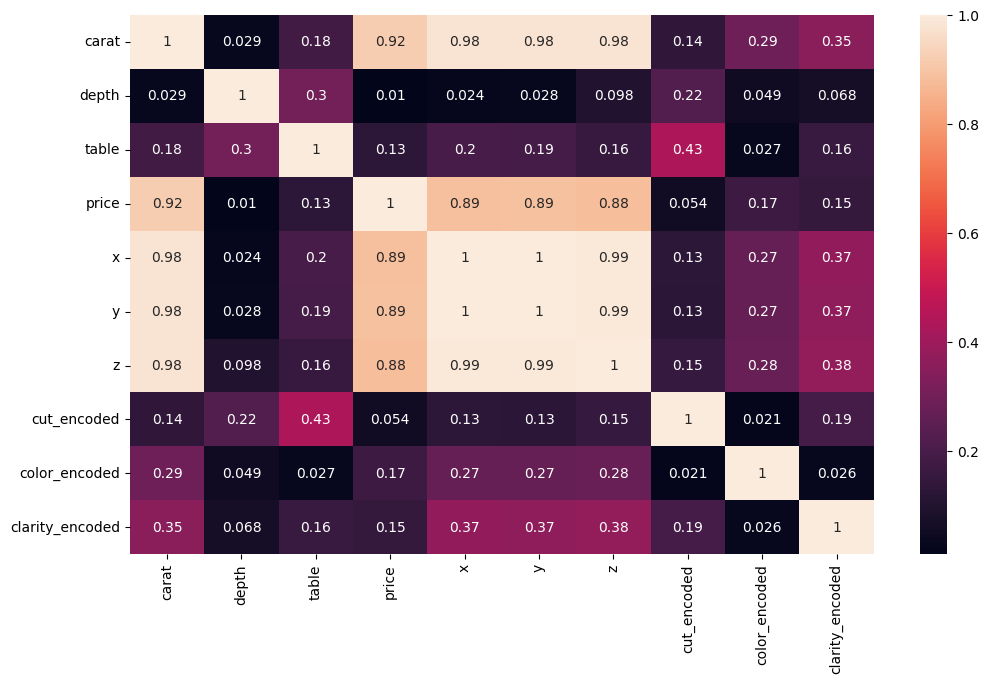

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(df1.corr().abs(), annot=True)
plt.show()

Карат (вес), длина, ширина и глубина сильно коррелируют между друг другом, а также влияют на целевое значение - цену. Поскольку эти фичи несут схожую информацию, оставим одну характеристику (карат), а остальные три удалим (x, y, z).

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df_reg_1 = df1.copy()
df_reg_1 = df1.drop(['x', 'y', 'z'], axis=1)

X = df_reg_1.drop(['price'], axis=1)
y = df_reg_1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(43124, 6) (10781, 6) (43124,) (10781,)


In [ ]:
# Cоздадим датафрейм, куда будем записывать ошибки каждой модели
models = pd.DataFrame(columns=['model', 'mse_test', 'mse_train', 'mae_test', 'mae_train'])
models

,model,mse_test,mse_train,mae_test,mae_train


In [ ]:
from sklearn.model_selection import GridSearchCV

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = lin_reg.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

MSE test = 1474424.495
MAE test = 851.727
MSE train = 1531780.657
MAE train = 853.999


In [ ]:
m1 = {'model': 'LinearRegression', 'mse_test': mse, 'mse_train': mse_train, 'mae_test': mae, 'mae_train': mae_train}
models = pd.concat([models, pd.DataFrame([m1])], ignore_index=True)

# Lasso

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_reg = Lasso()

param_grid = {'alpha': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]}
grid_lasso = GridSearchCV(estimator=lasso_reg, param_grid=param_grid)
grid_lasso.fit(X_train, y_train)

print('Лучшие параметры:', grid_lasso.best_params_)

Лучшие параметры: {'alpha': 0.1}


In [ ]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

y_pred = lasso_reg.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = lasso_reg.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

MSE test = 1474426.246
MAE test = 851.685
MSE train = 1531780.743
MAE train = 853.958


In [ ]:
m2 = {'model': 'Lasso', 'mse_test': mse, 'mse_train': mse_train, 'mae_test': mae, 'mae_train': mae_train}
models = pd.concat([models, pd.DataFrame([m2])], ignore_index=True)

# Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_reg = Ridge()

param_grid = {'alpha': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]}
grid_ridge = GridSearchCV(estimator=ridge_reg, param_grid=param_grid)
grid_ridge.fit(X_train, y_train)

print('Лучшие параметры:', grid_ridge.best_params_)

Лучшие параметры: {'alpha': 10}


In [ ]:
ridge_reg = Lasso(alpha=10)
ridge_reg.fit(X_train, y_train)

y_pred = ridge_reg.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = ridge_reg.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

MSE test = 1475401.09
MAE test = 847.795
MSE train = 1532614.586
MAE train = 850.173


In [ ]:
m3 = {'model': 'Ridge', 'mse_test': mse, 'mse_train': mse_train, 'mae_test': mae, 'mae_train': mae_train}
models = pd.concat([models, pd.DataFrame([m3])], ignore_index=True)

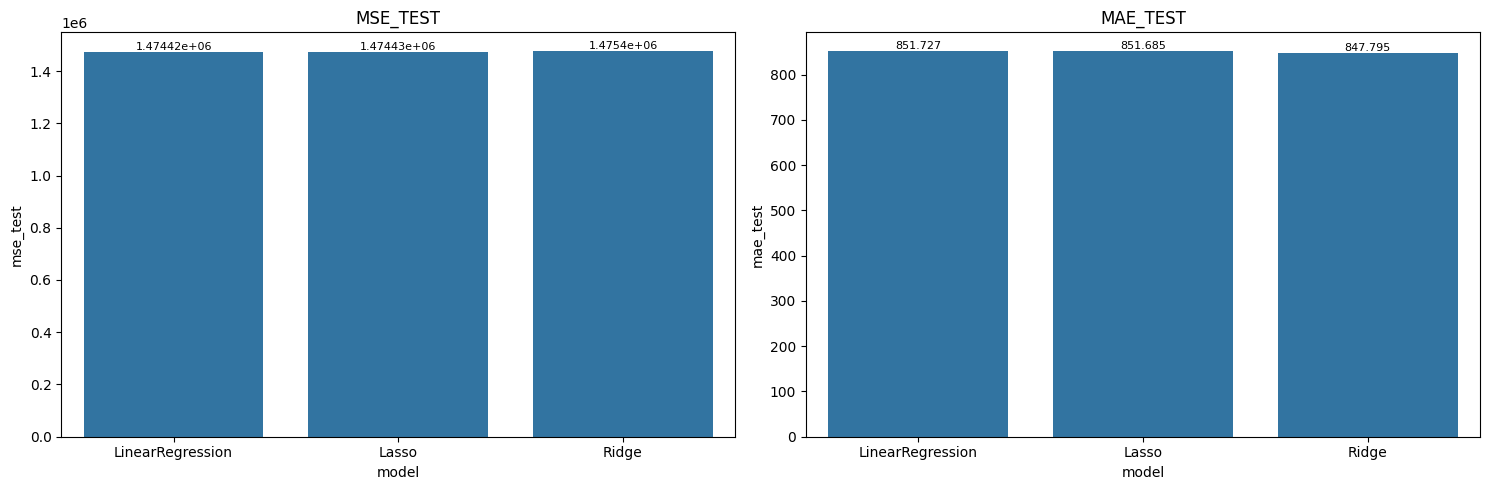

In [ ]:
y = models[['mse_test', 'mae_test']]
x = models[(models['model']=='LinearRegression') | (models['model']=='Lasso') | (models['model']=='Ridge')]

plt.figure(figsize = (15, 5))
for i, col in enumerate(y.columns, 1):
  plt.subplot(1, 2, i)
  ax = sns.barplot(x=x['model'], y=y[col])
  ax.bar_label(ax.containers[0], fontsize=8)
  plt.title(f'{col.upper()}')
  plt.tight_layout()
plt.show()

Модели LinearRegression, Lasso и Ridge имеют схожие результаты ошибок.

# SVM Regression

In [ ]:
from sklearn.svm import SVR

In [ ]:
# SVR linear
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train)

print('SVR linear')
y_pred = svm_reg.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = svm_reg.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

m4 = {'model': 'SVR linear', 'mse_test': mse, 'mse_train': mse_train, 'mae_test': mae, 'mae_train': mae_train}
models = pd.concat([models, pd.DataFrame([m4])], ignore_index=True)


# SVR rbf
svm_reg_rbf = SVR(kernel='rbf')
svm_reg_rbf.fit(X_train, y_train)

print('\nSVR rbf')
y_pred = svm_reg_rbf.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = svm_reg_rbf.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

m5 = {'model': 'SVR rbf', 'mse_test': mse, 'mse_train': mse_train, 'mae_test': mae, 'mae_train': mae_train}
models = pd.concat([models, pd.DataFrame([m5])], ignore_index=True)

SVR linear
MSE test = 2167159.683
MAE test = 809.435
MSE train = 2171019.623
MAE train = 802.66

SVR rbf
MSE test = 9311462.279
MAE test = 1619.458
MSE train = 9037904.435
MAE train = 1587.131


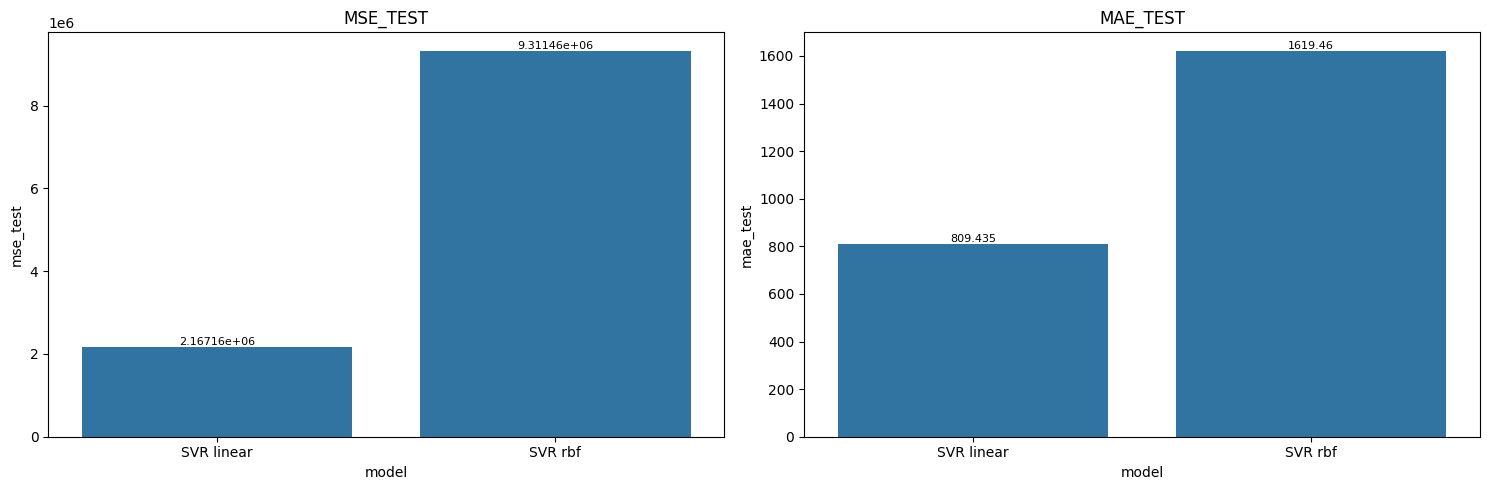

In [ ]:
y = models[['mse_test', 'mae_test']]
x = models[(models['model']=='SVR linear') | (models['model']=='SVR rbf')]

plt.figure(figsize = (15, 5))
for i, col in enumerate(y.columns, 1):
  plt.subplot(1, 2, i)
  ax = sns.barplot(x=x['model'], y=y[col])
  ax.bar_label(ax.containers[0], fontsize=8)
  plt.title(f'{col.upper()}')
  plt.tight_layout()
plt.show()

При kernel = linear ошибки получились меньше, поэтому дальше будем подбирать параметры для этого kernel.

In [ ]:
# C=10
svm_reg_10 = SVR(kernel='linear', C=10)
svm_reg_10.fit(X_train, y_train)

print('C = 10')
y_pred = svm_reg_10.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = svm_reg_10.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

m6 = {'model': 'SVR linear 1', 'mse_test': mse, 'mse_train': mse_train, 'mae_test': mae, 'mae_train': mae_train}
models = pd.concat([models, pd.DataFrame([m6])], ignore_index=True)


# C=100
svm_reg_100 = SVR(kernel='linear', C=100)
svm_reg_100.fit(X_train, y_train)

print('\nC = 100')
y_pred = svm_reg_100.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = svm_reg_100.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

m7 = {'model': 'SVR linear 2', 'mse_test': mse, 'mse_train': mse_train, 'mae_test': mae, 'mae_train': mae_train}
models = pd.concat([models, pd.DataFrame([m7])], ignore_index=True)


# C=1000
svm_reg_1000 = SVR(kernel='linear', C=1000)
svm_reg_1000.fit(X_train, y_train)

print('\nC = 1000')
y_pred = svm_reg_1000.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = svm_reg_1000.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

m8 = {'model': 'SVR linear 3', 'mse_test': mse, 'mse_train': mse_train, 'mae_test': mae, 'mae_train': mae_train}
models = pd.concat([models, pd.DataFrame([m8])], ignore_index=True)

C = 10
MSE test = 1863512.19
MAE test = 794.504
MSE train = 1887797.213
MAE train = 792.408

C = 100
MSE test = 1831805.629
MAE test = 793.81
MSE train = 1858510.515
MAE train = 792.269

C = 1000
MSE test = 1826922.918
MAE test = 793.718
MSE train = 1854006.392
MAE train = 792.267


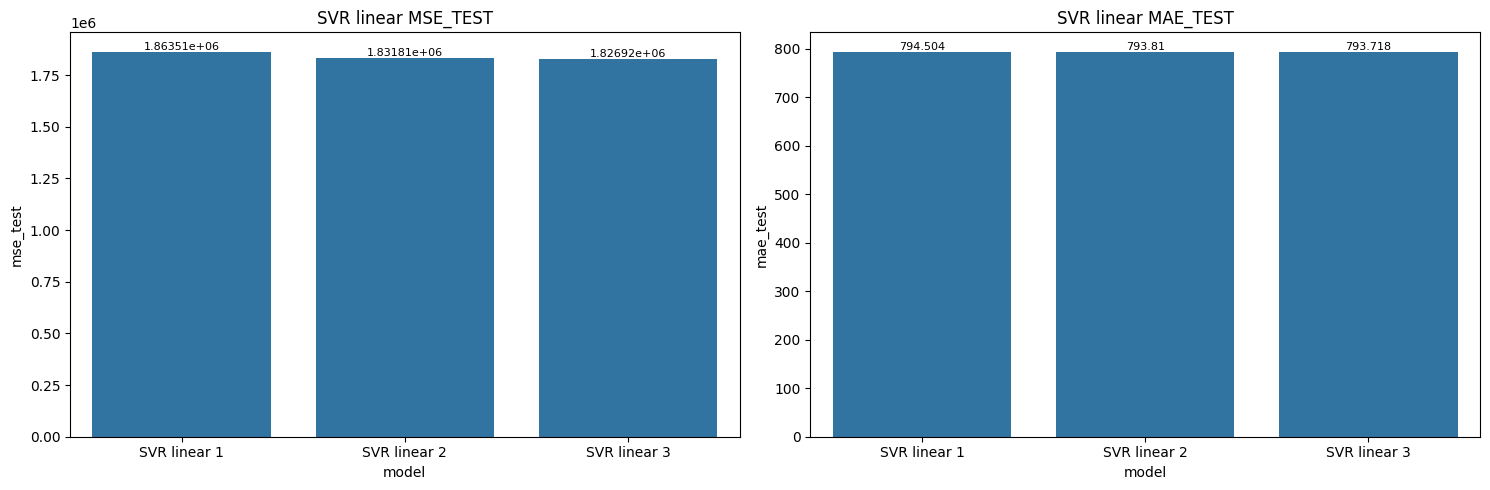

In [ ]:
y = models[['mse_test', 'mae_test']]
x = models[(models['model']=='SVR linear 1') | (models['model']=='SVR linear 2') | (models['model']=='SVR linear 3')]

plt.figure(figsize = (15, 5))
for i, col in enumerate(y.columns, 1):
  plt.subplot(1, 2, i)
  ax = sns.barplot(x=x['model'], y=y[col])
  ax.bar_label(ax.containers[0], fontsize=8)
  plt.title(f'SVR linear {col.upper()}')
  plt.tight_layout()
plt.show()

Меньше ошибка получилась у модели SVR linear 3 с параметром С = 1000.

# Neural Network

In [ ]:
df_reg_1 = df1.copy()
df_reg_1 = df1.drop(['x', 'y', 'z'], axis=1)

X = df_reg_1.drop(['price'], axis=1)
y = df_reg_1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(43124, 6) (10781, 6) (43124,) (10781,)


In [ ]:
import tensorflow as ts
from tensorflow import keras

In [ ]:
# Neural Network 1
nn1 = keras.Sequential([
      keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
      keras.layers.Dense(16, activation='relu'),
      keras.layers.Dense(1, activation='relu')
  ])
nn1.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])
nn1.fit(X_train, y_train, epochs=100)

In [ ]:
y_pred = nn1.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = nn1.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

m9 = {'model': 'Neural Network 1', 'mse_test': mse, 'mse_train': mse_train, 'mae_test': mae, 'mae_train': mae_train}
models = pd.concat([models, pd.DataFrame([m9])], ignore_index=True)

337/337 [==============================] - 1s 1ms/step
MSE test = 398054.025
MAE test = 360.522
1348/1348 [==============================] - 2s 1ms/step
MSE train = 385886.618
MAE train = 354.389


In [ ]:
# Neural Network 2
nn2 = keras.Sequential([
      keras.layers.Dense(8, input_shape=(X_train.shape[1],)),
      keras.layers.Dense(16, activation='relu'),
      keras.layers.Dense(1, activation='relu')
  ])
nn2.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
nn2.fit(X_train, y_train, epochs=100)

In [ ]:
y_pred = nn2.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = nn2.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

m10 = {'model': 'Neural Network 2', 'mse_test': mse, 'mse_train': mse_train, 'mae_test': mae, 'mae_train': mae_train}
models = pd.concat([models, pd.DataFrame([m10])], ignore_index=True)

337/337 [==============================] - 0s 1ms/step
MSE test = 545188.131
MAE test = 409.819
1348/1348 [==============================] - 2s 1ms/step
MSE train = 492133.217
MAE train = 401.312


In [ ]:
# Neural Network 3
nn3 = keras.Sequential([
      keras.layers.Dense(7, activation='relu', input_shape=(X_train.shape[1],)),
      keras.layers.Dense(14, activation='relu'),
      keras.layers.Dense(1, activation='relu')
  ])
nn3.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])
nn3.fit(X_train, y_train, epochs=100)

In [ ]:
y_pred = nn3.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = nn3.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

m11 = {'model': 'Neural Network 3', 'mse_test': mse, 'mse_train': mse_train, 'mae_test': mae, 'mae_train': mae_train}
models = pd.concat([models, pd.DataFrame([m11])], ignore_index=True)

337/337 [==============================] - 0s 1ms/step
MSE test = 419807.183
MAE test = 366.842
1348/1348 [==============================] - 2s 1ms/step
MSE train = 414020.285
MAE train = 360.543


In [ ]:
# Neural Network 4
nn4 = keras.Sequential([
      keras.layers.Dense(7, activation='relu', input_shape=(X_train.shape[1],)),
      keras.layers.Dense(1, activation='relu')
  ])
nn4.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])
nn4.fit(X_train, y_train, epochs=100)

In [ ]:
y_pred = nn4.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = nn4.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

m12 = {'model': 'Neural Network 4', 'mse_test': mse, 'mse_train': mse_train, 'mae_test': mae, 'mae_train': mae_train}
models = pd.concat([models, pd.DataFrame([m12])], ignore_index=True)

337/337 [==============================] - 0s 1ms/step
MSE test = 849363.057
MAE test = 479.933
1348/1348 [==============================] - 2s 1ms/step
MSE train = 914855.404
MAE train = 480.853


In [ ]:
# Neural Network 5
nn5 = keras.Sequential([
      keras.layers.Dense(7, activation='relu', input_shape=(X_train.shape[1],)),
      keras.layers.Dense(14, activation='elu'),
      keras.layers.Dense(1, activation='relu')
  ])
nn5.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])
nn5.fit(X_train, y_train, epochs=100)

In [ ]:
y_pred = nn5.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = nn5.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

m13 = {'model': 'Neural Network 5', 'mse_test': mse, 'mse_train': mse_train, 'mae_test': mae, 'mae_train': mae_train}
models = pd.concat([models, pd.DataFrame([m13])], ignore_index=True)

337/337 [==============================] - 1s 2ms/step
MSE test = 400559.206
MAE test = 355.709
1348/1348 [==============================] - 2s 1ms/step
MSE train = 391786.439
MAE train = 355.561


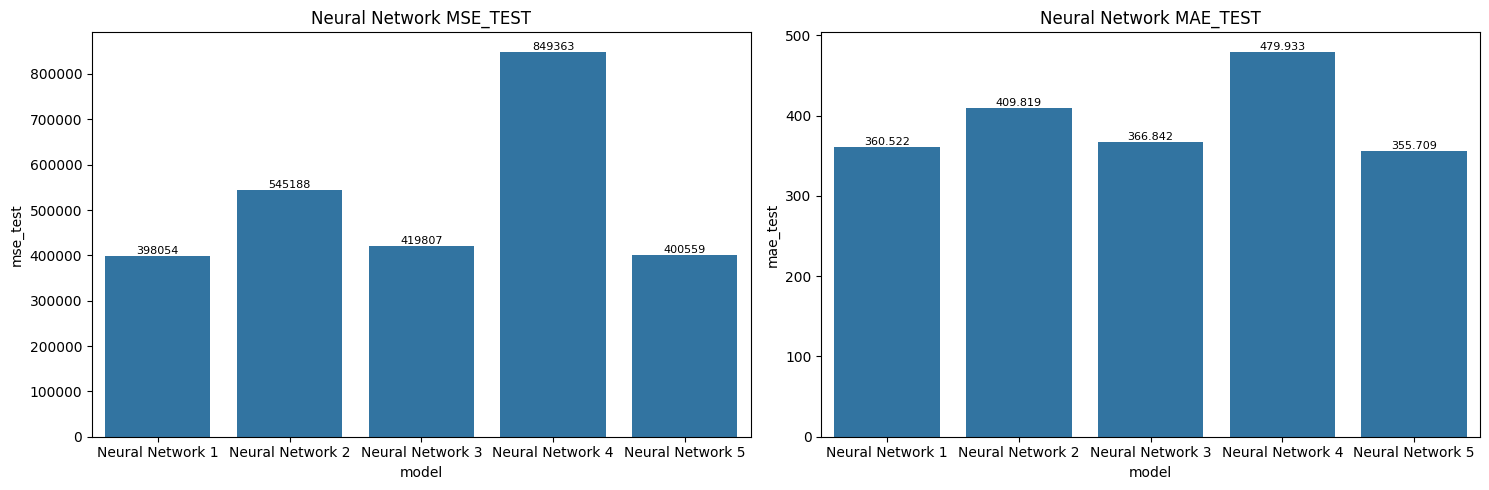

In [ ]:
y = models[['mse_test', 'mae_test']]
x = models[(models['model']=='Neural Network 1') | (models['model']=='Neural Network 2') | (models['model']=='Neural Network 3') | (models['model']=='Neural Network 4') | (models['model']=='Neural Network 5')]

plt.figure(figsize = (15, 5))
for i, col in enumerate(y.columns, 1):
  plt.subplot(1, 2, i)
  ax = sns.barplot(x=x['model'], y=y[col])
  ax.bar_label(ax.containers[0], fontsize=8)
  plt.title(f'Neural Network {col.upper()}')
  plt.tight_layout()
plt.show()

По MSE лучшая модель Neural Network 1, по MAE - Neural Network 5.

# Decision Tree Regression

In [ ]:
df_reg_1 = df1.copy()
df_reg_1 = df1.drop(['x', 'y', 'z'], axis=1)

X = df_reg_1.drop(['price'], axis=1)
y = df_reg_1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(43124, 6) (10781, 6) (43124,) (10781,)


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr = DecisionTreeRegressor()

param_grid = {'max_depth': range(2, 16),
              'min_samples_leaf': range(1, 11),
              'min_samples_split': range(2, 11)}
grid_dtr = GridSearchCV(estimator=dtr, param_grid=param_grid)
grid_dtr.fit(X_train, y_train)

print('Лучшие параметры:', grid_dtr.best_params_)

Лучшие параметры: {'max_depth': 12, 'min_samples_leaf': 6, 'min_samples_split': 6}


In [ ]:
# DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=12, min_samples_leaf=6, min_samples_split=6)
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = dtr.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

m14 = {'model': 'DecisionTreeRegressor', 'mse_test': mse, 'mse_train': mse_train, 'mae_test': mae, 'mae_train': mae_train}
models = pd.concat([models, pd.DataFrame([m14])], ignore_index=True)

MSE test = 366631.147
MAE test = 314.552
MSE train = 236799.158
MAE train = 259.819


In [ ]:
# Влияние признаков
feature_imp = pd.Series(dtr.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp

carat              0.891883
clarity_encoded    0.068547
color_encoded      0.034577
depth              0.002291
cut_encoded        0.002135
table              0.000568
dtype: float64

Удалим признаки, которые мало влияют на таргет, и посмотрим повлияет ли это на модель.

In [ ]:
X_train = X_train[['carat', 'clarity_encoded', 'color_encoded', 'depth', 'cut_encoded']]
X_test = X_test[['carat', 'clarity_encoded', 'color_encoded', 'depth', 'cut_encoded']]

dtr = DecisionTreeRegressor()

param_grid = {'max_depth': range(2, 16),
              'min_samples_leaf': range(1, 11),
              'min_samples_split': range(2, 11)}
grid_dtr = GridSearchCV(estimator=dtr, param_grid=param_grid)
grid_dtr.fit(X_train, y_train)

print('Лучшие параметры:', grid_dtr.best_params_)

Лучшие параметры: {'max_depth': 12, 'min_samples_leaf': 6, 'min_samples_split': 2}


In [ ]:
dtr = DecisionTreeRegressor(max_depth=12, min_samples_leaf=6, min_samples_split=2)
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = dtr.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

MSE test = 362263.913
MAE test = 312.143
MSE train = 240518.433
MAE train = 261.811


При удалении признака table оценка модели немного улучшилась.

# Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df_reg_1 = df1.copy()
df_reg_1 = df1.drop(['x', 'y', 'z'], axis=1)

X = df_reg_1.drop(['price'], axis=1)
y = df_reg_1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(43124, 6) (10781, 6) (43124,) (10781,)


In [ ]:
# RandomForestRegressor 1
rfr_10 = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=6, min_samples_split=6)
rfr_10.fit(X_train, y_train)

print('Max depth 10')
y_pred = rfr_10.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = rfr_10.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

m15 = {'model': 'RandomForestRegressor 1', 'mse_test': mse, 'mse_train': mse_train, 'mae_test': mae, 'mae_train': mae_train}
models = pd.concat([models, pd.DataFrame([m15])], ignore_index=True)


# RandomForestRegressor 2
rfr_12 = RandomForestRegressor(n_estimators=100, max_depth=12, min_samples_leaf=6, min_samples_split=6)
rfr_12.fit(X_train, y_train)

print('\nMax depth 12')
y_pred = rfr_12.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = rfr_12.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

m16 = {'model': 'RandomForestRegressor 2', 'mse_test': mse, 'mse_train': mse_train, 'mae_test': mae, 'mae_train': mae_train}
models = pd.concat([models, pd.DataFrame([m16])], ignore_index=True)


# RandomForestRegressor 3
rfr_13 = RandomForestRegressor(n_estimators=100, max_depth=13, min_samples_leaf=6, min_samples_split=6)
rfr_13.fit(X_train, y_train)

print('\nMax depth 13')
y_pred = rfr_13.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = rfr_13.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

m17 = {'model': 'RandomForestRegressor 3', 'mse_test': mse, 'mse_train': mse_train, 'mae_test': mae, 'mae_train': mae_train}
models = pd.concat([models, pd.DataFrame([m17])], ignore_index=True)

Max depth 10
MSE test = 323155.791
MAE test = 298.046
MSE train = 260086.138
MAE train = 273.003

Max depth 12
MSE test = 307050.437
MAE test = 286.434
MSE train = 218599.572
MAE train = 246.862

Max depth 13
MSE test = 305594.342
MAE test = 284.511
MSE train = 208103.987
MAE train = 239.73


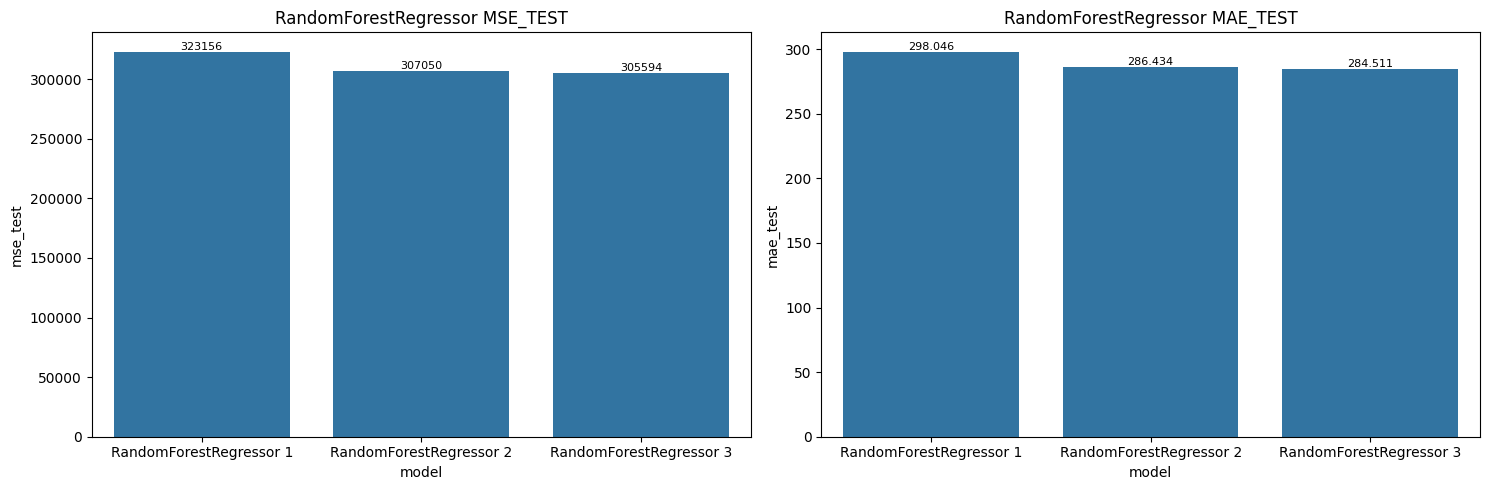

In [ ]:
y = models[['mse_test', 'mae_test']]
x = models[(models['model']=='RandomForestRegressor 1') | (models['model']=='RandomForestRegressor 2') | (models['model']=='RandomForestRegressor 3')]

plt.figure(figsize = (15, 5))
for i, col in enumerate(y.columns, 1):
  plt.subplot(1, 2, i)
  ax = sns.barplot(x=x['model'], y=y[col])
  ax.bar_label(ax.containers[0], fontsize=8)
  plt.title(f'RandomForestRegressor {col.upper()}')
  plt.tight_layout()
plt.show()

Лучше результаты получились у модели RandomForestRegressor 3 с параметрами n_estimators=100, max_depth=13, min_samples_leaf=6, min_samples_split=6.

# XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# XGBRegressor 1
xgb_reg1 = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1)
xgb_reg1.fit(X_train, y_train)

y_pred = xgb_reg1.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = xgb_reg1.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

m18 = {'model': 'XGBRegressor 1', 'mse_test': mse, 'mse_train': mse_train, 'mae_test': mae, 'mae_train': mae_train}
models = pd.concat([models, pd.DataFrame([m18])], ignore_index=True)

MSE test = 276330.159
MAE test = 276.38
MSE train = 226187.786
MAE train = 254.688


In [ ]:
# XGBRegressor 2
xgb_reg2 = XGBRegressor(n_estimators=100, max_depth=16, learning_rate=0.01)
xgb_reg2.fit(X_train, y_train)

y_pred = xgb_reg2.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = xgb_reg2.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

m19 = {'model': 'XGBRegressor 2', 'mse_test': mse, 'mse_train': mse_train, 'mae_test': mae, 'mae_train': mae_train}
models = pd.concat([models, pd.DataFrame([m19])], ignore_index=True)

MSE test = 2532248.71
MAE test = 1172.518
MSE train = 2397101.62
MAE train = 1133.948


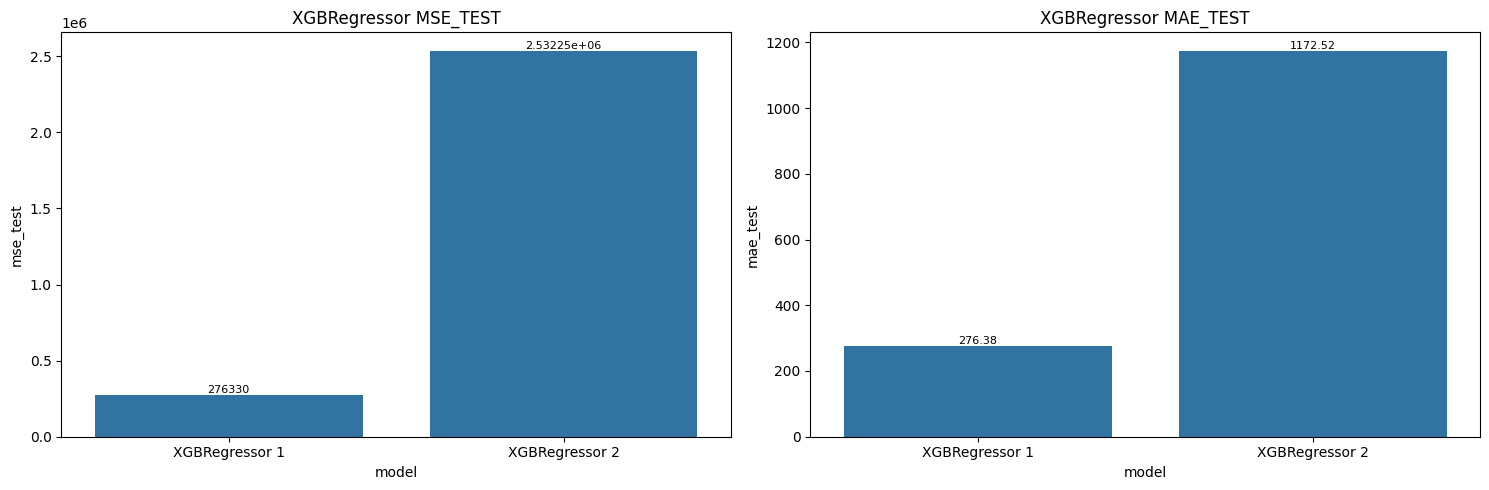

In [ ]:
y = models[['mse_test', 'mae_test']]
x = models[(models['model']=='XGBRegressor 1') | (models['model']=='XGBRegressor 2')]

plt.figure(figsize = (15, 5))
for i, col in enumerate(y.columns, 1):
  plt.subplot(1, 2, i)
  ax = sns.barplot(x=x['model'], y=y[col])
  ax.bar_label(ax.containers[0], fontsize=8)
  plt.title(f'XGBRegressor {col.upper()}')
  plt.tight_layout()
plt.show()

Лучше результаты получились у модели XGBRegressor 1 с параметрами n_estimators=100, max_depth=6, learning_rate=0.1.

# LightGBM

In [ ]:
df_reg_1 = df1.copy()
df_reg_1 = df1.drop(['x', 'y', 'z'], axis=1)

X = df_reg_1.drop(['price'], axis=1)
y = df_reg_1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(43124, 6) (10781, 6) (43124,) (10781,)


In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
# LGBMRegressor 1
lgbm_reg1 = LGBMRegressor(n_estimators=200, max_depth=14, learning_rate=0.1, num_leaves=28)
lgbm_reg1.fit(X_train, y_train)

In [ ]:
y_pred = lgbm_reg1.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = lgbm_reg1.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

m20 = {'model': 'LGBMRegressor 1', 'mse_test': mse, 'mse_train': mse_train, 'mae_test': mae, 'mae_train': mae_train}
models = pd.concat([models, pd.DataFrame([m20])], ignore_index=True)

MSE test = 279435.79
MAE test = 276.776
MSE train = 210643.19
MAE train = 252.325


In [ ]:
# LGBMRegressor 2
lgbm_reg2 = LGBMRegressor(n_estimators=200, max_depth=8, learning_rate=0.1, num_leaves=16)
lgbm_reg2.fit(X_train, y_train)

In [ ]:
y_pred = lgbm_reg2.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = lgbm_reg2.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

m21 = {'model': 'LGBMRegressor 2', 'mse_test': mse, 'mse_train': mse_train, 'mae_test': mae, 'mae_train': mae_train}
models = pd.concat([models, pd.DataFrame([m21])], ignore_index=True)

MSE test = 283271.581
MAE test = 283.297
MSE train = 239638.432
MAE train = 266.869


In [ ]:
# LGBMRegressor 3
lgbm_reg3 = LGBMRegressor(n_estimators=200, max_depth=12, learning_rate=0.1, num_leaves=24)
lgbm_reg3.fit(X_train, y_train)

In [ ]:
y_pred = lgbm_reg3.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = lgbm_reg3.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

m22 = {'model': 'LGBMRegressor 3', 'mse_test': mse, 'mse_train': mse_train, 'mae_test': mae, 'mae_train': mae_train}
models = pd.concat([models, pd.DataFrame([m22])], ignore_index=True)

MSE test = 281607.772
MAE test = 278.692
MSE train = 218175.672
MAE train = 255.868


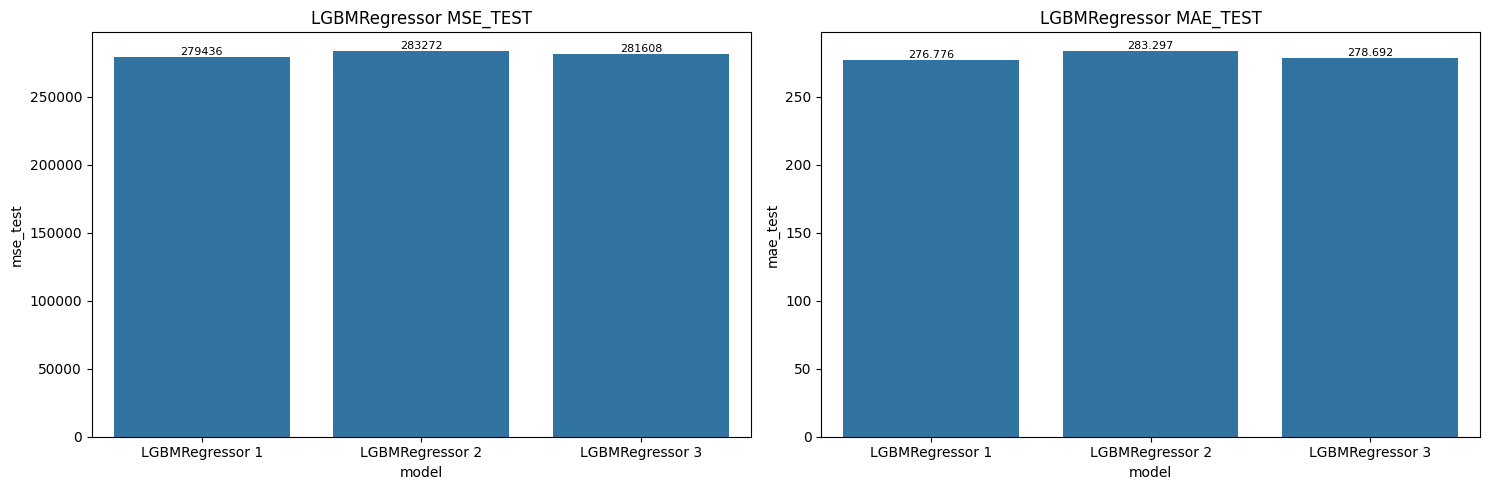

In [ ]:
y = models[['mse_test', 'mae_test']]
x = models[(models['model']=='LGBMRegressor 1') | (models['model']=='LGBMRegressor 2') | (models['model']=='LGBMRegressor 3')]

plt.figure(figsize = (15, 5))
for i, col in enumerate(y.columns, 1):
  plt.subplot(1, 2, i)
  ax = sns.barplot(x=x['model'], y=y[col])
  ax.bar_label(ax.containers[0], fontsize=8)
  plt.title(f'LGBMRegressor {col.upper()}')
  plt.tight_layout()
plt.show()

Лучше результаты у модели LGBMRegressor 1 с параметрами n_estimators=200, max_depth=14, learning_rate=0.1, num_leaves=28.

# CatBoost

In [ ]:
df_reg_1 = df1.copy()
df_reg_1 = df1.drop(['x', 'y', 'z'], axis=1)

X = df_reg_1.drop(['price'], axis=1)
y = df_reg_1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train.head(3)

(43124, 6) (10781, 6) (43124,) (10781,)


,carat,depth,table,cut_encoded,color_encoded,clarity_encoded
43382,0.55,62.4,55.0,4.0,4.0,2.0
27971,0.30,62.0,56.0,4.0,5.0,3.0
39739,0.35,61.2,55.0,4.0,3.0,5.0


In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
# CatBoostRegressor 1
cat_reg1 = CatBoostRegressor(depth=10, learning_rate=0.1)
cat_reg1.fit(X_train, y_train)

In [ ]:
# CatBoostRegressor 2
cat_reg2 = CatBoostRegressor(depth=10, learning_rate=0.01)
cat_reg2.fit(X_train, y_train)

In [ ]:
# CatBoostRegressor 3
cat_reg3 = CatBoostRegressor(depth=6, learning_rate=0.1)
cat_reg3.fit(X_train, y_train)

In [ ]:
# CatBoostRegressor 4
cat_reg4 = CatBoostRegressor(depth=6, learning_rate=0.01)
cat_reg4.fit(X_train, y_train)

In [ ]:
# CatBoostRegressor 1
print('CatBoostRegressor 1')
y_pred = cat_reg1.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = cat_reg1.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

m23 = {'model': 'CatBoostRegressor 1', 'mse_test': mse, 'mse_train': mse_train, 'mae_test': mae, 'mae_train': mae_train}
models = pd.concat([models, pd.DataFrame([m23])], ignore_index=True)


# CatBoostRegressor 2
print('\nCatBoostRegressor 2')
y_pred = cat_reg2.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = cat_reg2.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

m24 = {'model': 'CatBoostRegressor 2', 'mse_test': mse, 'mse_train': mse_train, 'mae_test': mae, 'mae_train': mae_train}
models = pd.concat([models, pd.DataFrame([m24])], ignore_index=True)


# CatBoostRegressor 3
print('\nCatBoostRegressor 3')
y_pred = cat_reg3.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = cat_reg3.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

m25 = {'model': 'CatBoostRegressor 3', 'mse_test': mse, 'mse_train': mse_train, 'mae_test': mae, 'mae_train': mae_train}
models = pd.concat([models, pd.DataFrame([m25])], ignore_index=True)


# CatBoostRegressor 4
print('\nCatBoostRegressor 4')
y_pred = cat_reg4.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = cat_reg4.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

m26 = {'model': 'CatBoostRegressor 4', 'mse_test': mse, 'mse_train': mse_train, 'mae_test': mae, 'mae_train': mae_train}
models = pd.concat([models, pd.DataFrame([m26])], ignore_index=True)

CatBoostRegressor 1
MSE test = 276005.407
MAE test = 270.725
MSE train = 124145.806
MAE train = 204.317

CatBoostRegressor 2
MSE test = 275330.454
MAE test = 277.153
MSE train = 243884.797
MAE train = 265.985

CatBoostRegressor 3
MSE test = 272500.908
MAE test = 273.124
MSE train = 194970.131
MAE train = 244.689

CatBoostRegressor 4
MSE test = 298148.964
MAE test = 292.34
MSE train = 289413.534
MAE train = 289.032


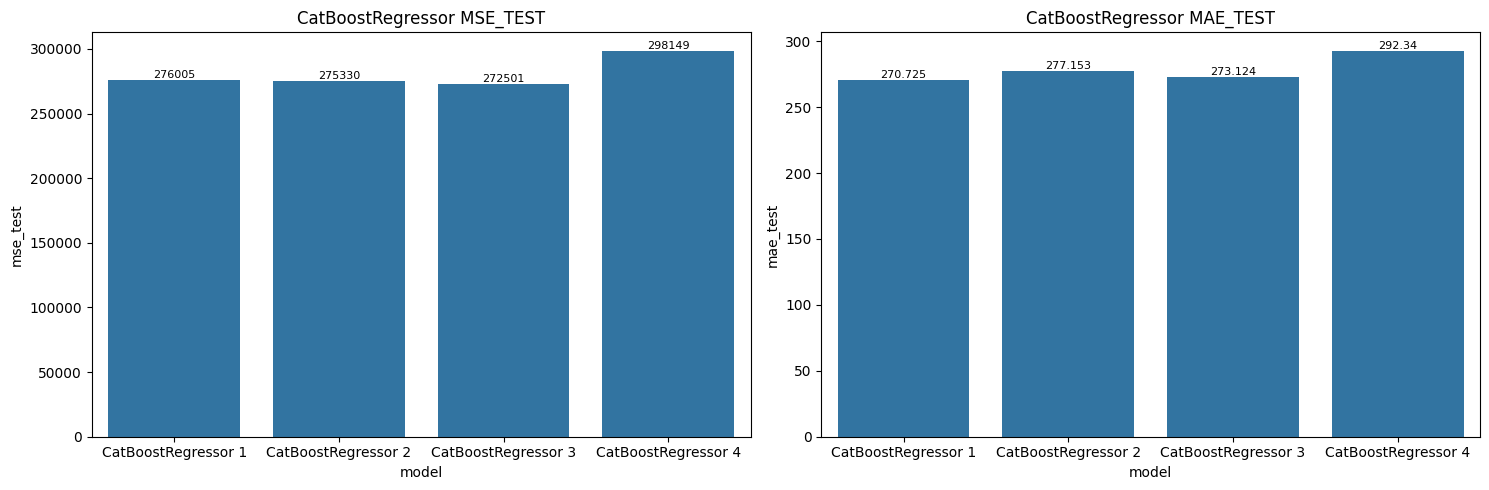

In [ ]:
y = models[['mse_test', 'mae_test']]
x = models[(models['model']=='CatBoostRegressor 1') | (models['model']=='CatBoostRegressor 2') | (models['model']=='CatBoostRegressor 3') | (models['model']=='CatBoostRegressor 4')]

plt.figure(figsize = (15, 5))
for i, col in enumerate(y.columns, 1):
  plt.subplot(1, 2, i)
  ax = sns.barplot(x=x['model'], y=y[col])
  ax.bar_label(ax.containers[0], fontsize=8)
  plt.title(f'CatBoostRegressor {col.upper()}')
  plt.tight_layout()
plt.show()

По MSE лучше результаты получились у модели CatBoostRegressor 3 с параметрами depth=6, learning_rate=0.1, по MAE - CatBoostRegressor 1 с параметрами depth=10, learning_rate=0.1.

CatBoostRegressor с категориальными признаками (без кодирования)

In [ ]:
df_reg_1 = df.copy()
df_reg_1 = df.drop(['x', 'y', 'z'], axis=1)

X = df_reg_1.drop(['price'], axis=1)
y = df_reg_1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train.head(3)

(43124, 6) (10781, 6) (43124,) (10781,)


,carat,cut,color,clarity,depth,table
43382,0.55,Ideal,F,SI1,62.4,55.0
27971,0.30,Ideal,E,VS2,62.0,56.0
39739,0.35,Ideal,G,VVS2,61.2,55.0


In [ ]:
# CatBoostRegressor 5
cat_features = ['cut', 'color', 'clarity']
cat_reg5 = CatBoostRegressor(depth=6, learning_rate=0.01, cat_features=cat_features)
cat_reg5.fit(X_train, y_train)

In [ ]:
# CatBoostRegressor 6
cat_features = ['cut', 'color', 'clarity']
cat_reg6 = CatBoostRegressor(depth=6, learning_rate=0.1, cat_features=cat_features)
cat_reg6.fit(X_train, y_train)

In [ ]:
# CatBoostRegressor 7
cat_features = ['cut', 'color', 'clarity']
cat_reg7 = CatBoostRegressor(depth=10, learning_rate=0.1, cat_features=cat_features)
cat_reg7.fit(X_train, y_train)

In [ ]:
# CatBoostRegressor 5
print('CatBoostRegressor 5')
y_pred = cat_reg5.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = cat_reg5.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

m27 = {'model': 'CatBoostRegressor 5', 'mse_test': mse, 'mse_train': mse_train, 'mae_test': mae, 'mae_train': mae_train}
models = pd.concat([models, pd.DataFrame([m27])], ignore_index=True)


# CatBoostRegressor 6
print('\nCatBoostRegressor 6')
y_pred = cat_reg6.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = cat_reg6.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

m28 = {'model': 'CatBoostRegressor 6', 'mse_test': mse, 'mse_train': mse_train, 'mae_test': mae, 'mae_train': mae_train}
models = pd.concat([models, pd.DataFrame([m28])], ignore_index=True)


# CatBoostRegressor 7
print('\nCatBoostRegressor 7')
y_pred = cat_reg7.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'MSE test = {mse}')
print(f'MAE test = {mae}')

y_pred_train = cat_reg7.predict(X_train)
mse_train = round(mean_squared_error(y_train, y_pred_train), 3)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
print(f'MSE train = {mse_train}')
print(f'MAE train = {mae_train}')

m29 = {'model': 'CatBoostRegressor 7', 'mse_test': mse, 'mse_train': mse_train, 'mae_test': mae, 'mae_train': mae_train}
models = pd.concat([models, pd.DataFrame([m29])], ignore_index=True)

CatBoostRegressor 5
MSE test = 312814.713
MAE test = 300.848
MSE train = 304171.187
MAE train = 297.103

CatBoostRegressor 6
MSE test = 270711.842
MAE test = 274.625
MSE train = 214734.997
MAE train = 254.849

CatBoostRegressor 7
MSE test = 273419.805
MAE test = 270.404
MSE train = 146508.011
MAE train = 218.465


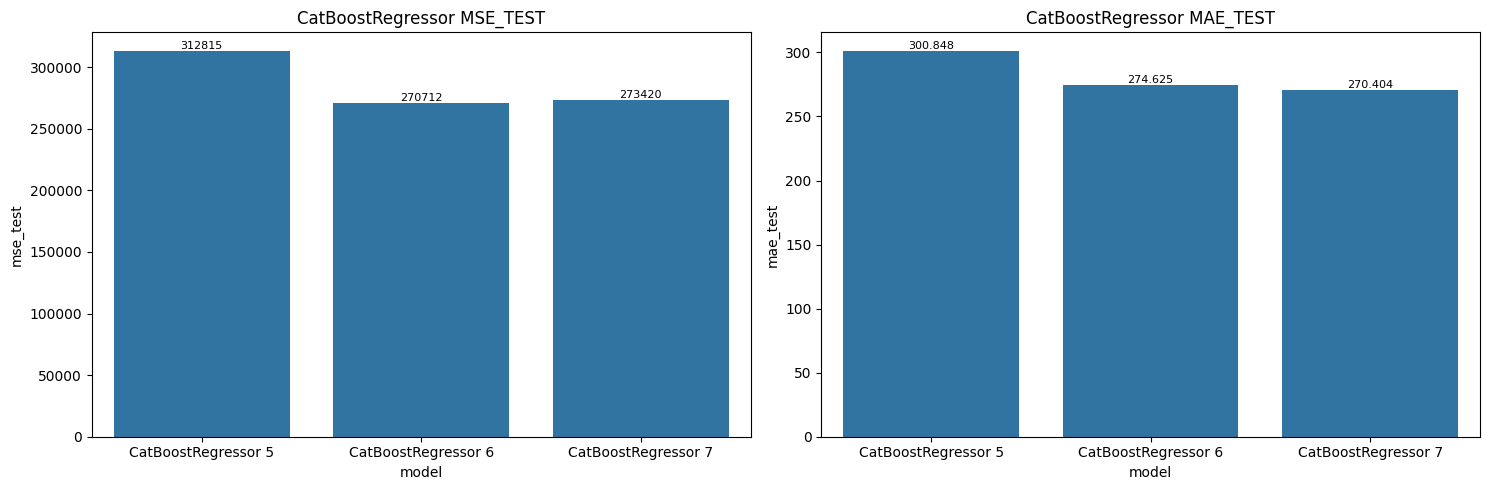

In [ ]:
y = models[['mse_test', 'mae_test']]
x = models[(models['model']=='CatBoostRegressor 5') | (models['model']=='CatBoostRegressor 6') | (models['model']=='CatBoostRegressor 7')]

plt.figure(figsize = (15, 5))
for i, col in enumerate(y.columns, 1):
  plt.subplot(1, 2, i)
  ax = sns.barplot(x=x['model'], y=y[col])
  ax.bar_label(ax.containers[0], fontsize=8)
  plt.title(f'CatBoostRegressor {col.upper()}')
  plt.tight_layout()
plt.show()

Лучший результат модели CatBoostRegressor с использованием категориальных признаков по MSE получился при параметрах depth=6, learning_rate=0.1 - CatBoostRegressor 6, по MAE при параметрах depth=10, learning_rate=0.1 - CatBoostRegressor 7.

# Models

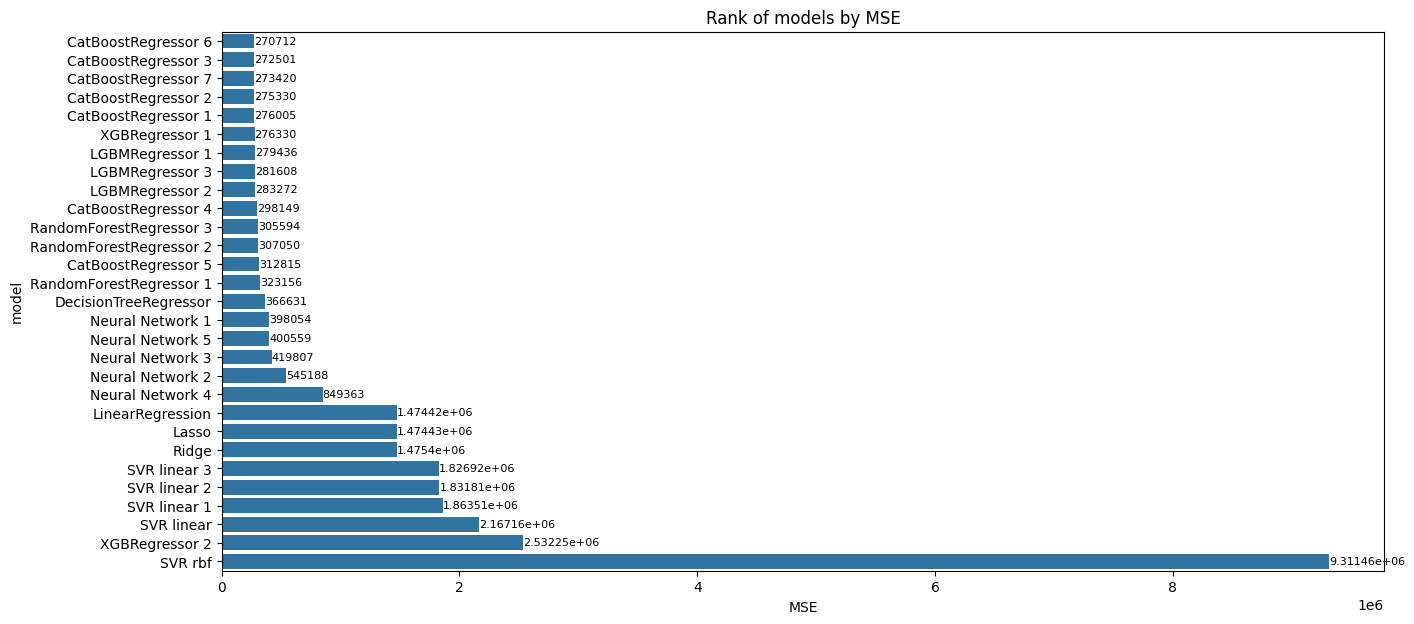

In [ ]:
plt.subplots(figsize=(15,7))
data = models.sort_values(by='mse_test')
ax = sns.barplot(data=data, x='mse_test', y='model')
ax.bar_label(ax.containers[0], fontsize=8)
plt.title('Rank of models by MSE')
plt.xlabel('MSE')
plt.show()

В топ моделей по MSE вошли модели CatBoostRegressor, LGBMRegressor и XGBRegressor с различными параметрами.

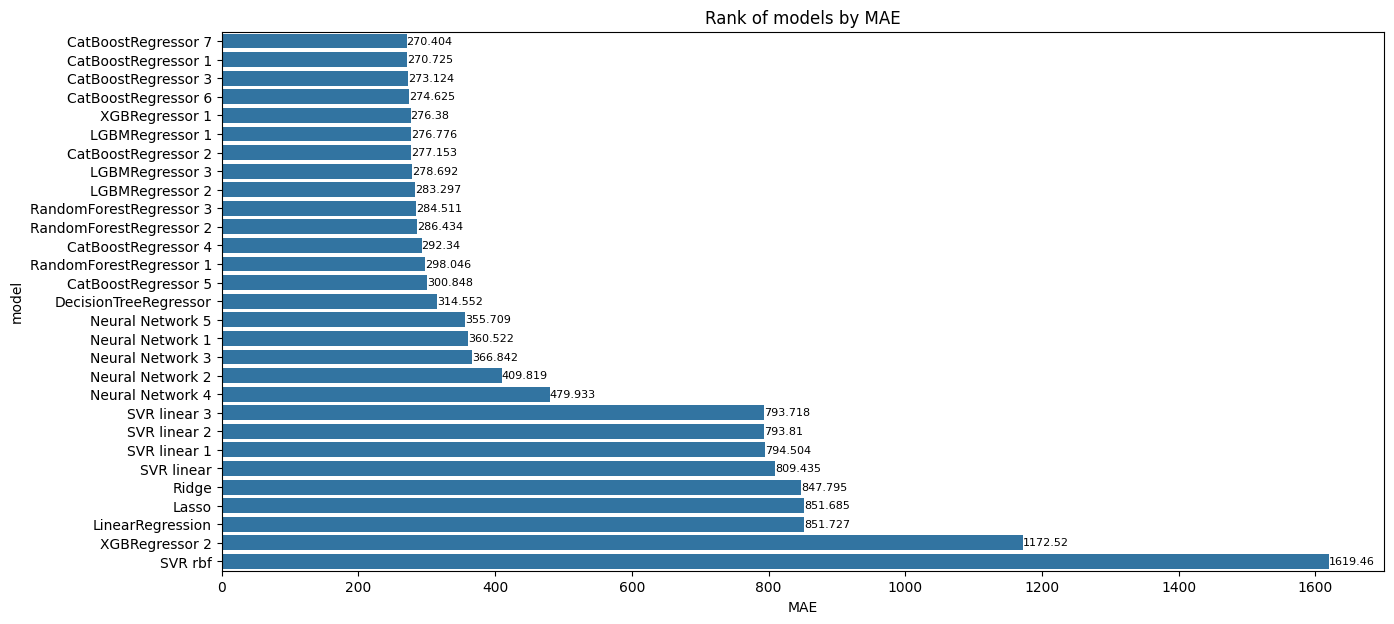

In [ ]:
plt.subplots(figsize=(15,7))
data = models.sort_values(by='mae_test')
ax = sns.barplot(data=data, x='mae_test', y='model')
ax.bar_label(ax.containers[0], fontsize=8)
plt.title('Rank of models by MAE')
plt.xlabel('MAE')
plt.show()

Аналогично как и по MSE, так и по MAE в топе модели CatBoostRegressor, LGBMRegressor, XGBRegressor и RandomForestRegressor.

Самые лучшие результаты показала модель CatBoostRegressor, причем в двух вариациях реализации - с кодированием категориальных параметров, так и без кодирования категориальных параметров.

Модели XGBRegressor и LGBMRegressor также показали хорошие результаты.

Хуже всего получились результаты у моделей SVR linear/rbf, LinearRegression, Lasso и Ridge.